# Análisis Exploratorio de Datos.
Inferencia estadística

Por: Carlos Alberto Arriaga Solorzano

El análisis exploratorio de datos (EDA), es una técnica inicial de minería de datos, que permite resumir información, así como identificar las variables de mayor importancia, las relaciones sistemáticas entre las mismas, anomalías y patrones subyacentes en amplios conjuntos de datos.
Funciona como un primer paso para la elección de modelos, y la formulación de hipótesis.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

## Variables y sus tipos.




Recordemos que, una variable, es una característica que se desea estudiar, de los individuos de una muestra.

Se clasifican en dos tipos:


*   Cuantitativas: Se miden en escala numérica. (Edad, ingreso económico, altura, peso).
*   Cualitativas: Se clasifican en categorías no numéricas. (Mes de nacimiento, género, tipo de sangre).



### Análisis de variables cuantitativas.

#### Frecuencias.

Supongamos que vamos a analizar una variable cuantitativa de una muestra de tamaño $n$.
Es decir, contamos con $n$ observaciones de dicha variable. Digamos que los valores observados de la variable, son $\lbrace x_1, x_2, ..., x_k\rbrace$, donde $x_i$ fue observado $g_i$ veces. Al haber efectuado $n$ observaciones, debe ocurrir que $\sum_{i=1}^k g_i=n$



Para cada $x\in\mathbb{R}$, sea $f_x$ el número de observaciones recolectadas, que son estrictamente menores que $x$.

Podemos definir una función, que corresponda a la frecuencia relativa acumulada de la muestra observada: $F:\mathbb{R}\rightarrow [0,1]$, $F(x):=\frac{f_x}{n}$


In [55]:
# n = int(input("Tamaño de la muestra: "))
n = 18

Creamos una muestra aleatoria de enteros.

In [56]:
randomlist = np.array([31, 35, 37, 40, 40, 51, 54, 55, 57, 58, 60, 60, 62, 62, 65, 67, 75, 89])
print(randomlist)

[31 35 37 40 40 51 54 55 57 58 60 60 62 62 65 67 75 89]


In [57]:
values = sorted(set(randomlist))
print(sorted(values))

[31, 35, 37, 40, 51, 54, 55, 57, 58, 60, 62, 65, 67, 75, 89]


In [58]:
values_dict = {"x_"+str(i + 1):values[i] for i in range(0,len(values))}
print(values_dict)

{'x_1': 31, 'x_2': 35, 'x_3': 37, 'x_4': 40, 'x_5': 51, 'x_6': 54, 'x_7': 55, 'x_8': 57, 'x_9': 58, 'x_10': 60, 'x_11': 62, 'x_12': 65, 'x_13': 67, 'x_14': 75, 'x_15': 89}


In [59]:
frecuencies = {"g_"+str(i + 1):np.count_nonzero(randomlist == values[i]) for i in range(0,len(values))}
print(frecuencies)

{'g_1': 1, 'g_2': 1, 'g_3': 1, 'g_4': 2, 'g_5': 1, 'g_6': 1, 'g_7': 1, 'g_8': 1, 'g_9': 1, 'g_10': 2, 'g_11': 2, 'g_12': 1, 'g_13': 1, 'g_14': 1, 'g_15': 1}


In [60]:
sum(frecuencies.values())

18

In [61]:
def f(x):
  return len([u for u in randomlist if u<=x])

[31 35 37 40 40 51 54 55 57 58 60 60 62 62 65 67 75 89]
[31, 35, 37, 40, 51, 54, 55, 57, 58, 60, 62, 65, 67, 75, 89]
{'x_1': 31, 'x_2': 35, 'x_3': 37, 'x_4': 40, 'x_5': 51, 'x_6': 54, 'x_7': 55, 'x_8': 57, 'x_9': 58, 'x_10': 60, 'x_11': 62, 'x_12': 65, 'x_13': 67, 'x_14': 75, 'x_15': 89}
{'g_1': 1, 'g_2': 1, 'g_3': 1, 'g_4': 2, 'g_5': 1, 'g_6': 1, 'g_7': 1, 'g_8': 1, 'g_9': 1, 'g_10': 2, 'g_11': 2, 'g_12': 1, 'g_13': 1, 'g_14': 1, 'g_15': 1}


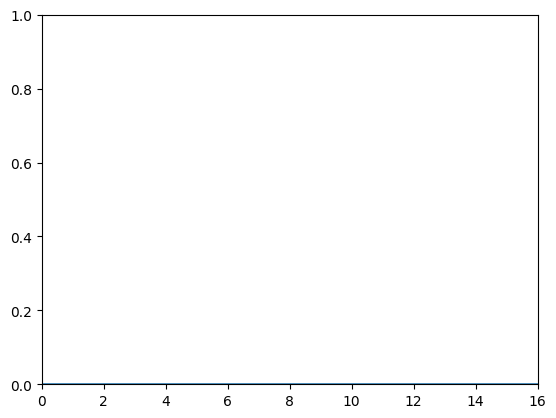

In [74]:
randomlist = np.array([31, 35, 37, 40, 40, 51, 54, 55, 57, 58, 60, 60, 62, 62, 65, 67, 75, 89])
print(randomlist)
values = sorted(set(randomlist))
print(sorted(values))
values_dict = {"x_"+str(i + 1):values[i] for i in range(0,len(values))}
print(values_dict)
frecuencies = {"g_"+str(i + 1):np.count_nonzero(randomlist == values[i]) for i in range(0,len(values))}
print(frecuencies)
sum(frecuencies.values())
def f(x):
  return len([u for u in randomlist if u<=x])
f(int(input()))

def F(x):
  return f(x)/n

x = [0+0.01*n for n in range(0,2000)]
plt.plot(x, [F(i) for i in x])
plt.xlim(0,16)
plt.ylim(0,1)
plt.show()

#### Medidas de tendencia central.

Las medidas de tendencia central, indican la localización de la muestra, encontrando valores significativos, que reflejan la "centralidad" de los datos desde diversos puntos de vista: Centro de masa, máximos globales, o el valor que divide la muestra a la mitad.


##### Cuantiles.

Supongamos que tenemos $n$ observaciones de una variable, ordenadas de menor a mayor, digamos $(x_1,x_2,...,x_n)$. Dado $p\in (0,1)$, el $100p$-percentil es el valor $u_i$ de la muestra, tal que, al menos una porción del $100p$% de las observaciones son menores o iguales que ese valor.

Notemos que dicho valor $u_i$ coincide con el valor $inf(\lbrace x\in\mathbb{R}|F(x)\geq p \rbrace)$, donde $F$ es la frecuencia relativa antes presentada.

La forma de calcular los cuantiles, se realiza como sigue:


*   Si $np$ no es entero, entonces el $100p$-percentil será $x_{⌈np⌉}$.
*   Si $np$ es entero, entonces el $100p$-percentil será $\frac{x_{⌈np⌉}+x_{⌈np⌉+1}}{2}$.


In [ ]:
def percentil(data, p):
  return np.nanquantile(sorted(data), float(p))

In [ ]:
print(percentil(randomlist, 0.5))

8.0


El primero, segundo y tercer cuartil, son $Q_1$, $Q_2$,$Q_3$, el $25$, $50$ y $75$-percentiles, respectivamente.

Se llama Rango intercuartil $(IQR)$ al número $Q_3-Q_1$.

In [ ]:
def Q_1(data):
  return percentil(data, 0.25)

def Q_2(data):
  return percentil(data, 0.5)

de
def IQR(data):
  return Q_3(data)-Q_1(data)

In [ ]:
IQR(randomlist)

6.0

Dado que el primer cuarto de muestras están antes de $Q_1$, y el último cuarto de muestras se encuentran después de $Q_3$, se sigue que la mitad de las muestras caen dentro de $[Q_1,Q_3]$. En este sentido, $[Q_1,Q_3]$ es el intervalo "central" de la muestra, y el $IQR$ es un indicador de la dispersión de la muestra, ya que refleja qué tan esparcida está la porción central de la muestra.

##### Valores atípicos. (Outliers).

Los valores atípicos, son los elementos de $(x_1,x_2,...,x_n)$ que no pertenecen al intervalo $[Q_1-\frac{3}{2}IQR,$ $Q_3+\frac{3}{2}IQR]$. Éstos valores, se encuentran distantes del área de mayor concentración de la muestra, y pueden desviar las interpretaciones.

In [ ]:
def outliers(data):
  return [x for x in sorted(data) if x<Q_1(data)-3*IQR(data)/2 or x>Q_3(data)+3*IQR(data)/2]

In [ ]:
outliers(randomlist)

[]

Si randomlist no tiene valores atípicos, creamos una nueva muestra aleatoria de una distribución normal estándar:

In [ ]:
m = input("Tamaño de la muestra: ")
data_0 = np.random.normal(0,1,int(m))
data_1 = np.append(data_0,10**10)
print(data_1[0:3])

Tamaño de la muestra: 100
[-0.93642384  1.30881367  1.23778768]


In [ ]:
outliers(data_1)

[2.714441707131579, 10000000000.0]

##### Media muestral.

La media muestral, es el número $\overline{x}:=\frac{1}{n}\sum_{i=1}^n x_i$.

La media muestral, representa el lugar en que se encuentra el centro de masa de la muestra (punto en que se equilibraría el segmento $x_n-x_1$, si los puntos $x_1,...,x_n$ tuvieran pesos iguales). También, $\overline{x}=min\lbrace \sum_{i=1}^n (a-x_i)^2| a\in\mathbb{R}\rbrace$.

Una desventaja de la media muestral, es que es sensible ante valores atípicos, es decir, la presencia de éstos puede modificar significativamente el valor de la media.

In [ ]:
np.mean(data_1)

99009900.96220143

Si omitimos los valores atípicos:

In [ ]:
def no_outliers(data):
  return [x for x in data if x not in outliers(data)]

In [ ]:
data_1_modif = no_outliers(data_1)
np.mean(data_1_modif)

NameError: ignored

##### Mediana muestral.

La mediana muestral, es el $50$-percentil de la muestra, es decir, el valor que divide la muestra a la mitad.

La mediana atiende únicamente al orden de los datos, perdiendo de vista el valor de los números, pero tiene la ventaja de que es menos sensible a la presencia de valores atípicos.

In [ ]:
np.median(data_1)

In [ ]:
np.median(data_1_modif)

#### Medidas de dispersión.

##### Varianza muestral.

La varianza muestra, se define como el número $\hat{\sigma}^2:=\frac{1}{n-1}\sum_{i=i}^n (x_i-x)^2$.

Recordemos que $\overline{x}$ minimizaba la suma de las desviaciones al cuadrado de un valor típico de la muestra $\sum_{i=1}^n (a-x_i)^2$. (Se toman cuadrados, porque el mínimo de la suma de las desviaciones es siempre cero). Así, dicho mínimo, que coincide con $\hat{\sigma}^2$, expresa qué tan concentradas o dispersas se encuentran las observaciones respecto a la media muestral.

Como en el caso de la media muestral, la varianza puede ser significativamente afectada por la presencia de valores atípicos, creando la impresión de una falsa dispersión.

In [ ]:
np.var(data_1)

In [ ]:
np.var(data_1_modif)

##### Desviación estándar muestral. (STD).

La desviación estándar muestral, se define como $\hat{\sigma}=\sqrt{\hat{\sigma}^2}$, es decir, la raíz cuadrada de la varianza.

La desviación estándar, se emplea como una solución a una malinterpretación de la varianza, debida a que los cuadrados pueden inflar desproporcionadamente la contribución de un valor atípico a la suma, de forma que mide la dispersión de los datos respecto a la media en las mismas unidades que los datos.

In [ ]:
np.std(data_1)

In [ ]:
np.std(data_1_modif)

##### Rango muestral.

El rango muestral, se define como $Rango :=max\lbrace x_1,...x_n\rbrace-min\lbrace x_1,...,x_n\rbrace$.

El rango muestral es la longitud del intervalo más pequeño que contiene a toda la muestra, y permite obtener una idea de la dispersión de los datos. Sin embargo, es igualmente sensible a valores atípicos.

In [ ]:
rango_1 = np.amax(data_1)-np.amin(data_1)
rango_2 = np.amax(data_1_modif)-np.amin(data_1_modif)
print(rango_1)
print(rango_2)

*Nota: Los cuartiles, así como el $IQR$, pueden utilizarse también como medidas de dispersión, y son menos sensibles a valores atípicos, al igual que la mediana; no obstante, pierden de vista el valor numérico de las observaciones.*

#### Medidas de simetría.

##### Sesgo muestral.

El sesgo muestral, se define como $SK:=\frac{\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^3}{(\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x}))^{3/2}}$

Si el sesgo es negativo, tendremos una distribución sesgada a la izquierda, es decir que la cola será más larga de ese lado, y la muestra estará cargada a la derecha.

Si el sesgo es cero, tendremos una distribución no sesgada, y por lo tanto, simétrica.

Si el sesgo es positivo, tendremos una distribución sesgada a la derech, es decir que la cola será más larga de ese lado, y la muestra estará cargada a la izquierda.

Una desventaja de esta medida, es, como en anteriores veces, la alta sensibilidad a valores atípicos.

In [ ]:
skew(data_1)

In [ ]:
skew(data_1_modif)

##### Curtosis.

La curtosis (del griego kurtos: "curvado, arqueado"), se define como $K := \frac{\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^4}{(\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2)^2}-3$.

El número 3, aparece debido a que se mide con respecto a la distribución normal, la cual tiene una curtosis igual a 3. La curtosis mide lo "picuda" que es la distribución, así como el peso de sus colas.

Si la curtosis es negativa (distribución platicúrtica), entonces la distribución será aplanada, sin picos pronunciados, y con colas más ligeras.

Si la curtosis es cero (distribución mesocúrtica), entonces la distribución tendrá la curvatura de una distribución normal.

Si la curtosis es positiva (distribución leptocúrtica), entonces la distribución tendrá picos pronunciados, y colas pesadas.

La curtosis también presenta sensibilidad a los valores atípicos.

In [ ]:
kurtosis(data_1)

In [ ]:
kurtosis(data_1_modif)